In [1]:
cd ../

C:\Users\patri\Documents\udemy\GitHub\finance-library


In [2]:
from pyvest import FamaFrenchDataReader, CAPM, FF3F

# Fama-French Data Reader

In [3]:
# Define dates
start_date = "1964-01-31"
end_date = "2023-08-31"

# Define the table to extract
beta_data_set = 'Portfolios_Formed_on_ME'

In [4]:
data_reader = FamaFrenchDataReader()

## Read factors

In [5]:
factors = data_reader.read_factors(start_date, end_date)
factors

,Mkt-RF,SMB,HML,RF
Date,,,,
1964-01,2.24,-0.11,1.48,0.30
1964-02,1.54,0.11,2.81,0.26
1964-03,1.41,0.87,3.40,0.31
1964-04,0.10,-1.35,-0.67,0.29
1964-05,1.42,-0.86,1.86,0.26
...,...,...,...,...
2023-04,0.61,-3.35,-0.04,0.35
2023-05,0.35,1.61,-7.72,0.36
2023-06,6.46,1.54,-0.26,0.40


## Read portfolio returns

In [6]:
beta_portfolios = data_reader.read_returns(beta_data_set, start_date, end_date)
beta_portfolios

,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,
1964-01,4.77,3.46,2.63,0.73,2.50,1.32,0.93,1.33,1.17,3.19
1964-02,2.70,2.46,2.86,3.36,2.32,2.16,3.05,2.95,2.05,1.47
1964-03,2.33,2.48,3.94,3.43,4.06,3.26,2.88,3.05,1.83,1.26
1964-04,0.05,-0.75,-0.64,-0.46,-1.07,-0.42,0.28,-1.06,-0.50,0.91
1964-05,0.78,0.21,1.95,2.76,1.37,0.88,2.07,1.91,1.00,1.76
...,...,...,...,...,...,...,...,...,...,...
2023-04,-1.43,-2.78,-1.61,-3.18,-1.56,-1.69,-0.75,-1.98,-0.43,1.87
2023-05,-0.11,1.41,1.00,0.73,-2.64,-1.91,-2.45,-2.23,-2.91,1.75
2023-06,4.28,6.33,7.85,8.07,8.79,8.39,10.07,8.10,8.15,6.35


# Create CAPM and FF3F models with the same portfolios

In [7]:
capm = CAPM(factors, beta_portfolios)

In [8]:
ff3f = FF3F(factors, beta_portfolios)

If no name is specified, the default name is "CAPM" for a CAPM model and "FF3F" for a FF3F model.

In [9]:
capm.name

'CAPM'

In [10]:
ff3f.name

'FF3F'

# Access X and Y

In [11]:
capm.X

,const,Mkt-RF
Date,,
1964-01,1.0,2.24
1964-02,1.0,1.54
1964-03,1.0,1.41
1964-04,1.0,0.10
1964-05,1.0,1.42
...,...,...
2023-04,1.0,0.61
2023-05,1.0,0.35
2023-06,1.0,6.46


In [12]:
capm.Y

,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,
1964-01,4.47,3.16,2.33,0.43,2.20,1.02,0.63,1.03,0.87,2.89
1964-02,2.44,2.20,2.60,3.10,2.06,1.90,2.79,2.69,1.79,1.21
1964-03,2.02,2.17,3.63,3.12,3.75,2.95,2.57,2.74,1.52,0.95
1964-04,-0.24,-1.04,-0.93,-0.75,-1.36,-0.71,-0.01,-1.35,-0.79,0.62
1964-05,0.52,-0.05,1.69,2.50,1.11,0.62,1.81,1.65,0.74,1.50
...,...,...,...,...,...,...,...,...,...,...
2023-04,-1.78,-3.13,-1.96,-3.53,-1.91,-2.04,-1.10,-2.33,-0.78,1.52
2023-05,-0.47,1.05,0.64,0.37,-3.00,-2.27,-2.81,-2.59,-3.27,1.39
2023-06,3.88,5.93,7.45,7.67,8.39,7.99,9.67,7.70,7.75,5.95


In [13]:
ff3f.X

,const,Mkt-RF,SMB,HML
Date,,,,
1964-01,1.0,2.24,-0.11,1.48
1964-02,1.0,1.54,0.11,2.81
1964-03,1.0,1.41,0.87,3.40
1964-04,1.0,0.10,-1.35,-0.67
1964-05,1.0,1.42,-0.86,1.86
...,...,...,...,...
2023-04,1.0,0.61,-3.35,-0.04
2023-05,1.0,0.35,1.61,-7.72
2023-06,1.0,6.46,1.54,-0.26


In [14]:
ff3f.Y

,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,
1964-01,4.47,3.16,2.33,0.43,2.20,1.02,0.63,1.03,0.87,2.89
1964-02,2.44,2.20,2.60,3.10,2.06,1.90,2.79,2.69,1.79,1.21
1964-03,2.02,2.17,3.63,3.12,3.75,2.95,2.57,2.74,1.52,0.95
1964-04,-0.24,-1.04,-0.93,-0.75,-1.36,-0.71,-0.01,-1.35,-0.79,0.62
1964-05,0.52,-0.05,1.69,2.50,1.11,0.62,1.81,1.65,0.74,1.50
...,...,...,...,...,...,...,...,...,...,...
2023-04,-1.78,-3.13,-1.96,-3.53,-1.91,-2.04,-1.10,-2.33,-0.78,1.52
2023-05,-0.47,1.05,0.64,0.37,-3.00,-2.27,-2.81,-2.59,-3.27,1.39
2023-06,3.88,5.93,7.45,7.67,8.39,7.99,9.67,7.70,7.75,5.95


## Access the results of each regression using the [] operator

In [15]:
capm.calculate_regressions(return_results=False)
ff3f.calculate_regressions(return_results=False)

In [16]:
capm["1"]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     1084.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          2.41e-145
Time:                        17:43:02   Log-Likelihood:                -2014.5
No. Observations:                 716   AIC:                             4033.
Df Residuals:                     714   BIC:                             4042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1244      0.152      0.818      0.414      -0.174       0.423
Mkt-RF         1.1045      0.034     32.926      0.000       1.039       1.170
==============================================================================
Omnibus:                      134.907   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              543.678
Skew:                           0.819   Prob(JB):                    8.75e-119
Kurtosis:                       6.942   Cond. No.                         4.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
ff3f["1"]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     2633.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:43:02   Log-Likelihood:                -1452.7
No. Observations:                 716   AIC:                             2913.
Df Residuals:                     712   BIC:                             2932.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0662      0.070     -0.945      0.345      -0.204       0.071
Mkt-RF         0.8939      0.016     54.891      0.000       0.862       0.926
SMB            1.2322      0.024     51.759      0.000       1.185       1.279
HML            0.2603      0.024     11.026      0.000       0.214       0.307
==============================================================================
Omnibus:                       53.855   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.565
Skew:                           0.392   Prob(JB):                     2.21e-30
Kurtosis:                       4.991   Cond. No.                         4.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plot realized vs. predicted average return

Note that the **plot()** method calculates automatically the regressions. In other words, you never really have to call **calculate_regressions()** explicitly.

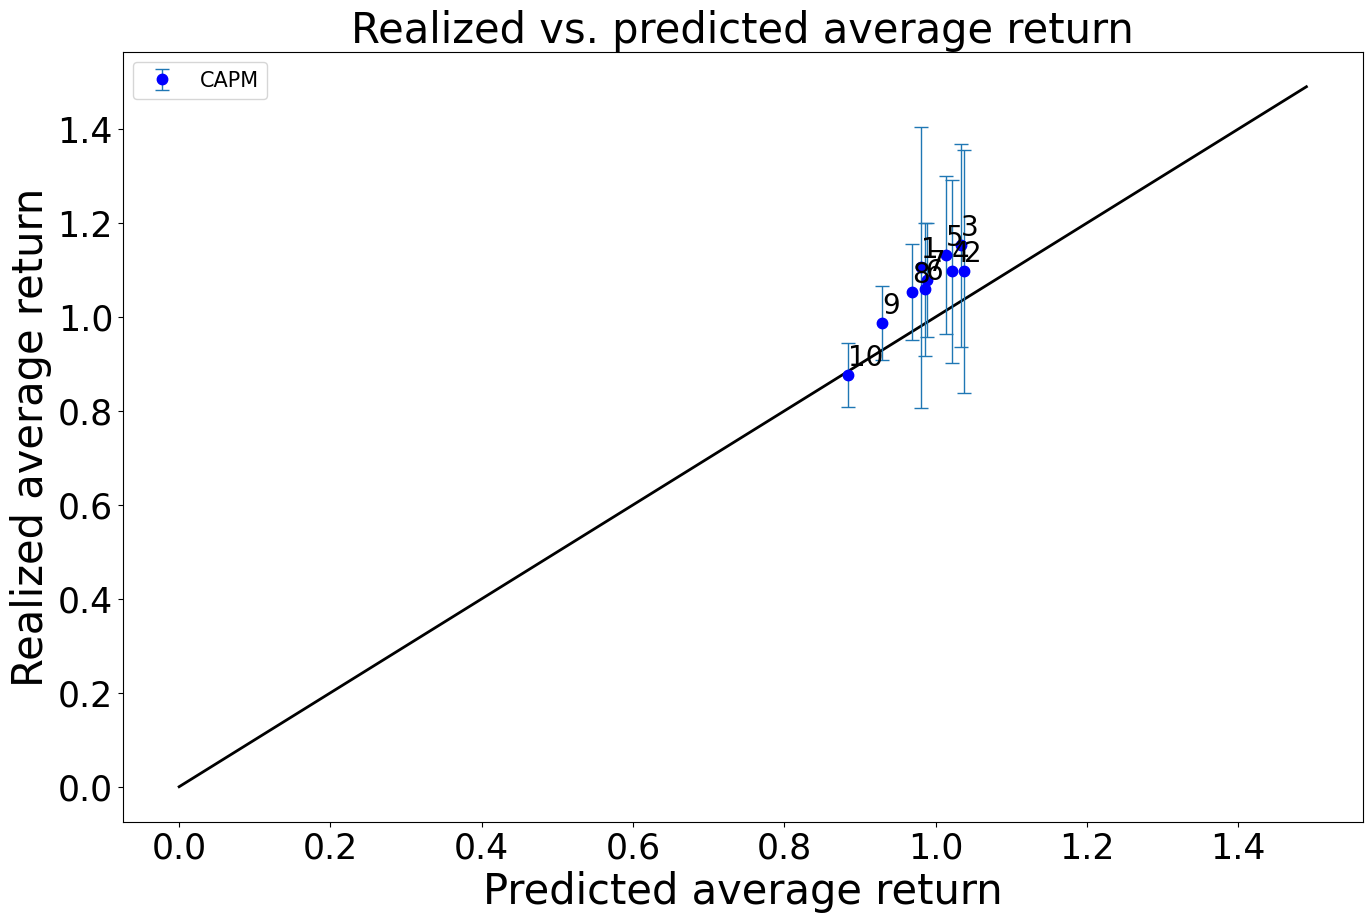

In [18]:
capm.plot(sml=False)

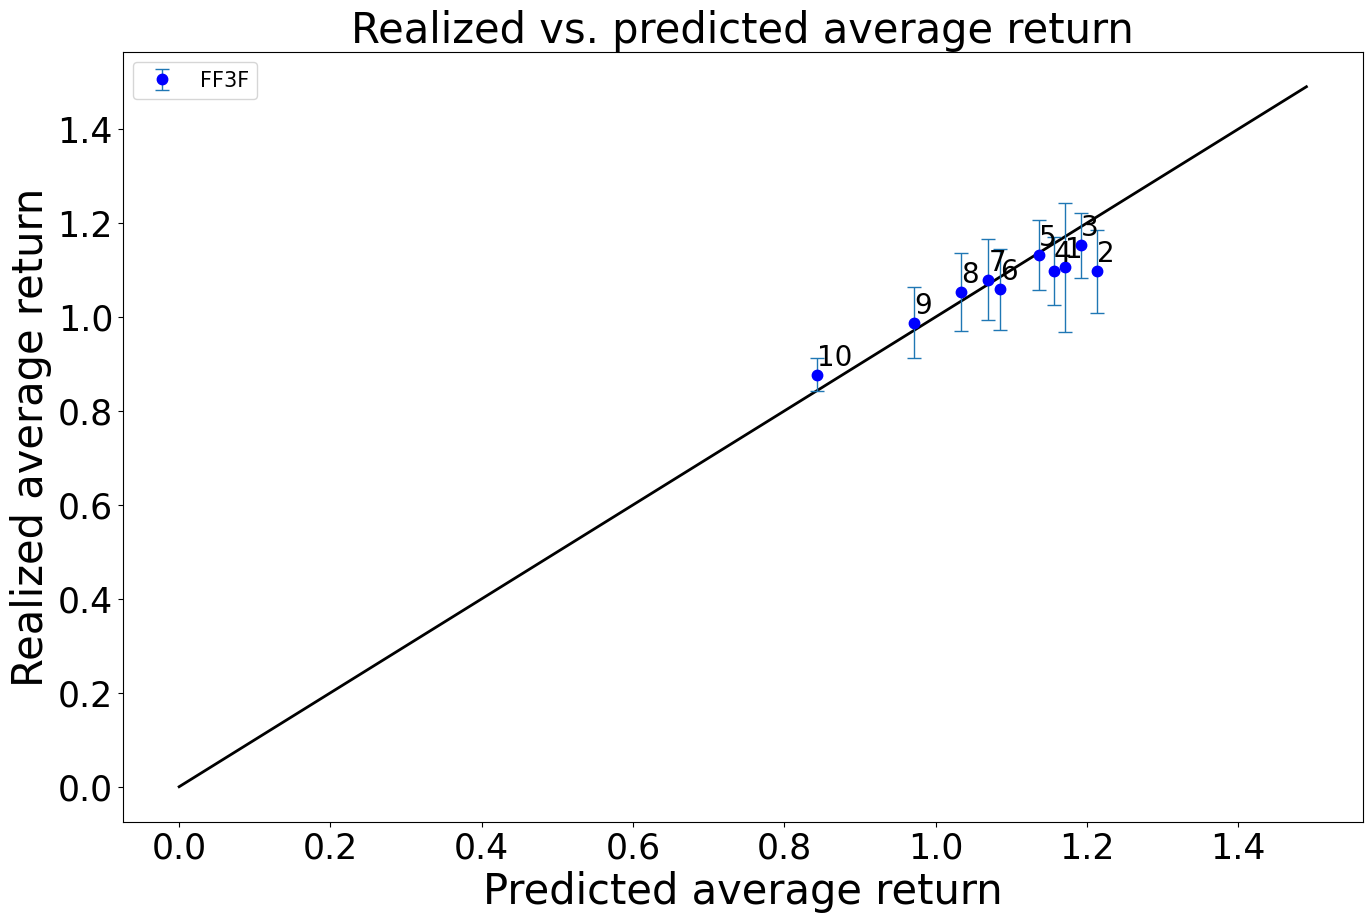

In [19]:
ff3f.plot()

# Plot CAPM vs FF3F on the same graph

Note that **sml** must be set to False when you plot a CAPM model along with an FF3F model, otherwise it throws an exception. I will try to set it by default to False in this case.

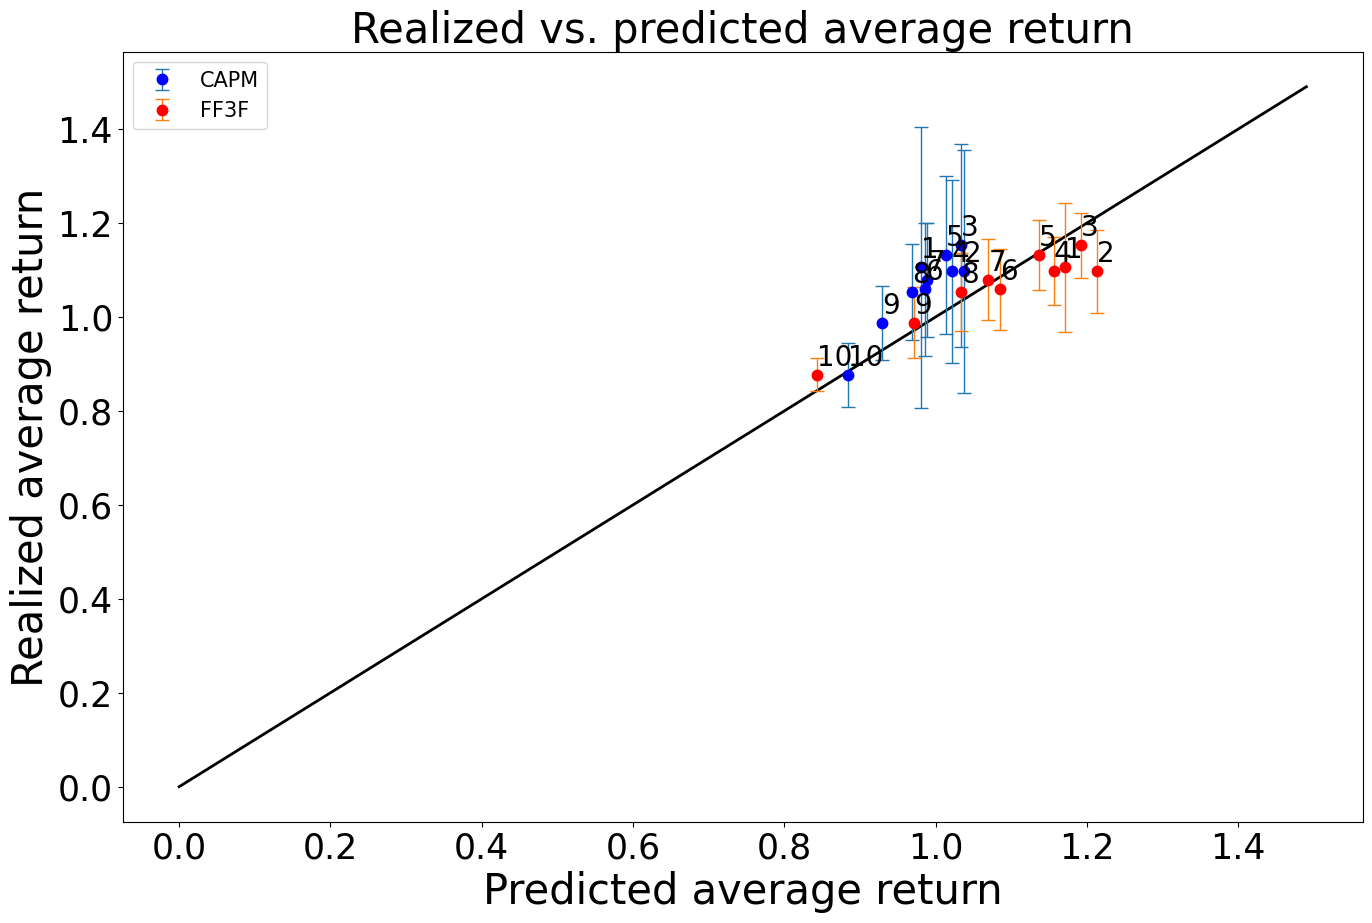

In [20]:
capm.plot(ff3f, sml=False)

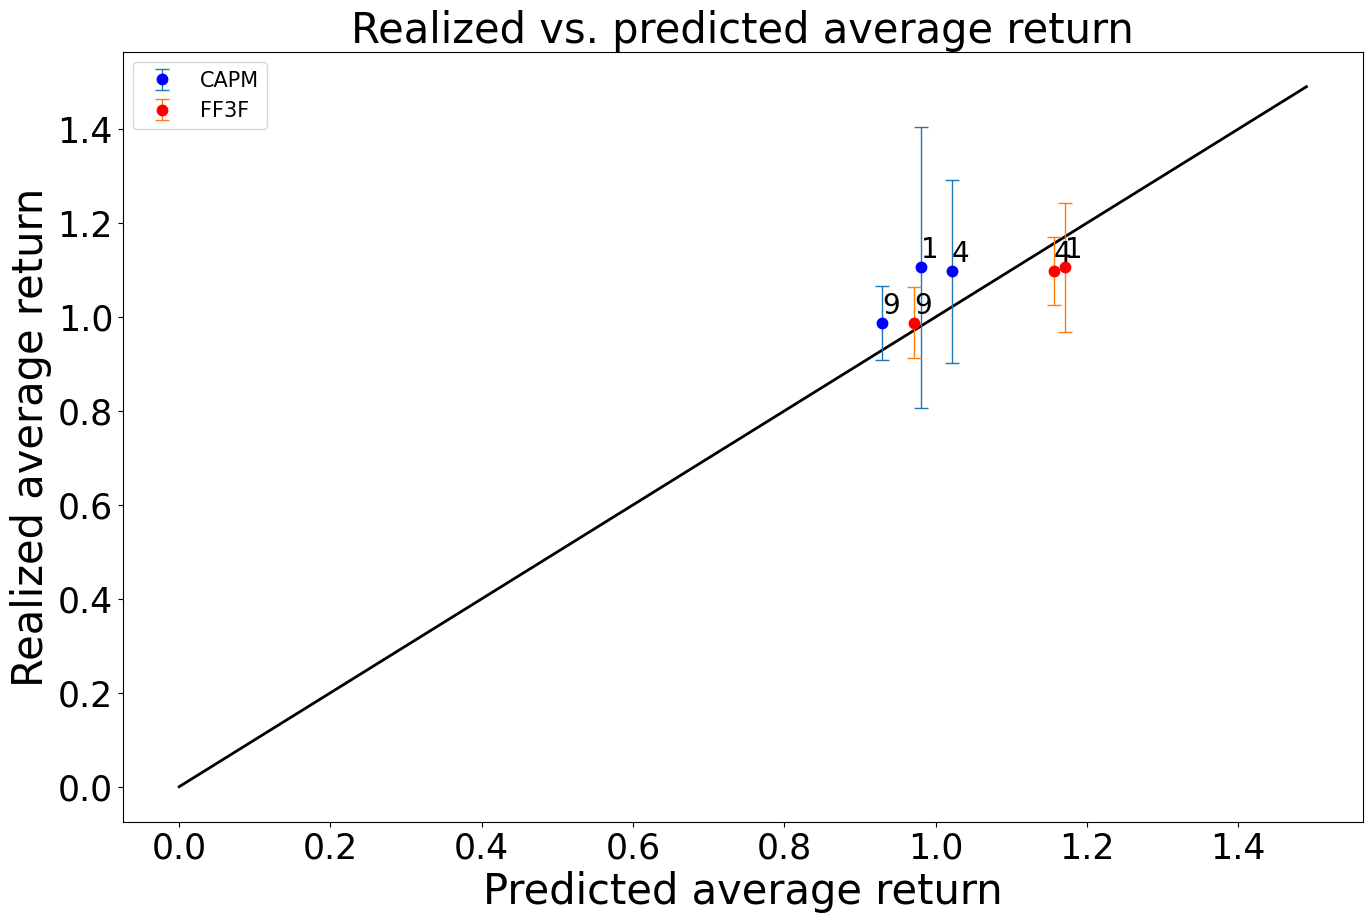

In [21]:
capm.plot(ff3f, sml=False, portfolios={"CAPM": ["1", "9", "4"], "FF3F": ["1", "9", "4"]})